In [17]:
import pandas as pd;
import geopandas as gp;



,NeightHood,count
0,Central Business District,213
1,South Side Flats,122
2,Carrick,120
3,East Liberty,94
4,Homewood North,85
...,...,...
85,Outside County,2
86,Mt. Oliver Boro,2
87,Regent Square,2
88,Glen Hazel,2


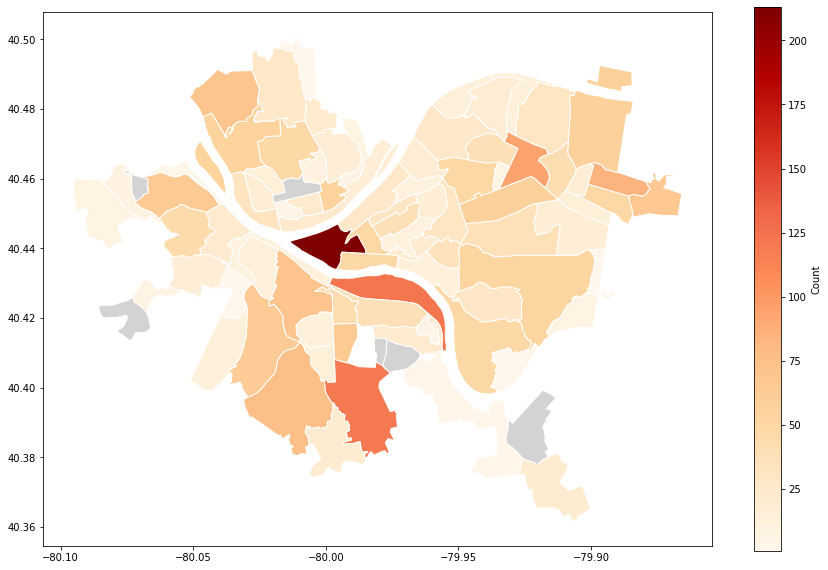

In [26]:
blotter=pd.read_csv("Blotter Data.csv")

#blotter.head()
neighborhoods = gp.read_file("data/Neighborhoods_.shp") # read in the shapefile

#neighborhoods.plot() # plot the geopandas dataframe
df2=blotter["INCIDENTNEIGHBORHOOD"].value_counts()
df3=pd.DataFrame({'NeightHood':df2.index, 'count':df2.values})
df3

map = neighborhoods.merge(df3, how='left', left_on='hood', right_on="NeightHood")
map.head()
map.plot(column="count",cmap='OrRd',edgecolor="white", legend=True,  legend_kwds={'label': "Count"},figsize=(15, 10), missing_kwds={"color": "lightgrey"}
)

In [19]:
#new_df2 = sorted(df2.items(), reverse=False) #alphabetical order
#del new_df2[4]
#new_df2

In [20]:
#Crime rate
#population=pd.read_csv("population.csv")

#list_population=[]
#for line in open('./population.csv','r',encoding='utf-8'):
    #list_population.append(line.strip())
#del list_population[0]
#list_population
#crimerate = list(map(lambda x: x[0]/x[1], zip(list_population, new_df2)))
#print (crimerate)
#crimerate = [a / b for a, b in zip(list_population, new_df2)]
#print (crimerate)


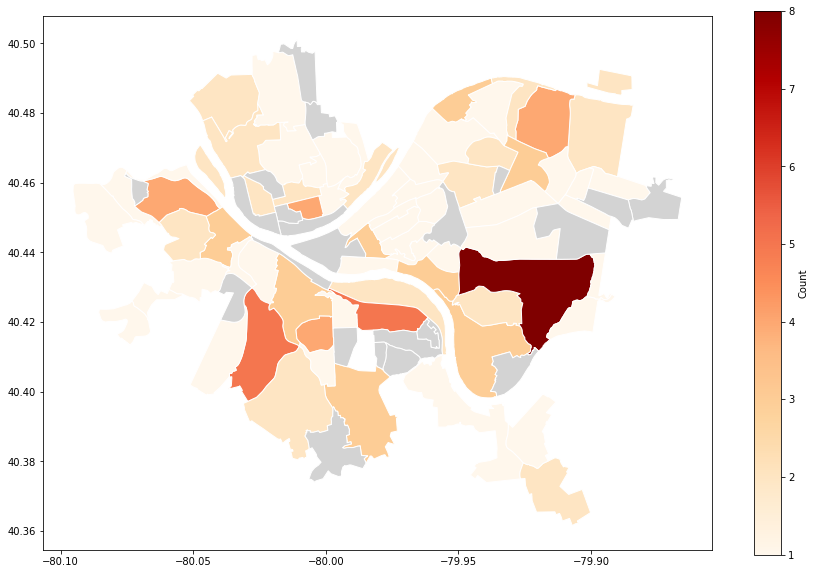

In [30]:
playground=pd.read_csv("Playgrounds.csv")
pg_neighborhoods = gp.read_file("data/Neighborhoods_.shp") 
playgrounds=playground["neighborhood"].value_counts()
pgcounts=pd.DataFrame({'neighborhood':playgrounds.index, 'count':playgrounds.values})
#pgcounts.plot()
#pgcounts.plot(kind="bar")
map = pg_neighborhoods.merge(pgcounts, how='left', left_on='hood', right_on="neighborhood")
map.head()
map.plot(column="count",cmap='OrRd',edgecolor="white", legend=True,  legend_kwds={'label': "Count"},figsize=(15, 10), missing_kwds={"color": "lightgrey"}
)

In [27]:
WRlocations=pd.read_csv("Waste Recovery Locations.csv")
#WRlocations
WRlocation_hood=WRlocations["neighborhood"].value_counts()
WRlocation_hood_dict=pd.DataFrame({'neightHood':WRlocation_hood.index, 'count':WRlocation_hood.values})

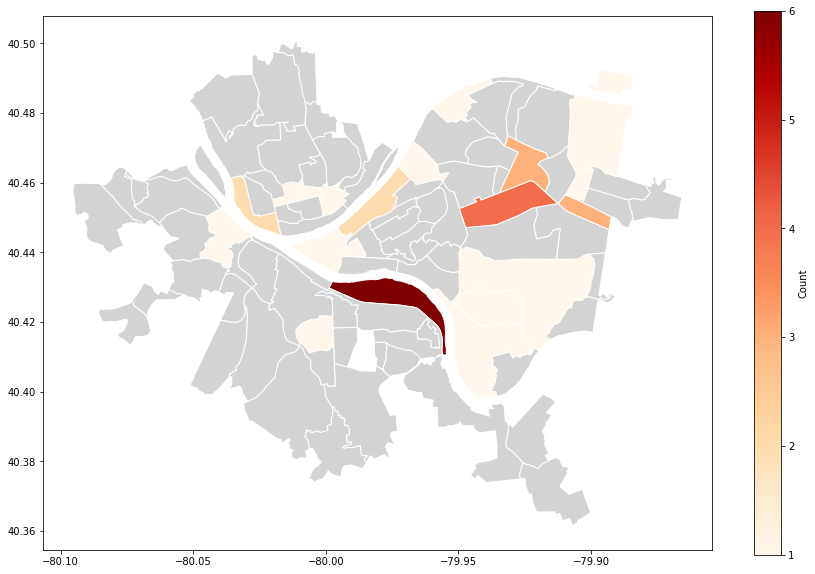

In [28]:
neighborhood = gp.read_file("data/Neighborhoods_.shp")
map = neighborhood.merge(WRlocation_hood_dict, how='left', left_on='hood', right_on="neightHood")
map.head()
map.plot(column="count",cmap='OrRd',edgecolor="white", legend=True,  legend_kwds={'label': "Count"},figsize=(15, 10), missing_kwds={"color": "lightgrey"}
)